In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

[-0.25004251 -0.23058968 -0.2284516  -0.22711497 -0.20238399 -0.19289268
 -0.19111926 -0.13003384 -0.11923774 -0.11088917 -0.08193282 -0.0800568
 -0.07836815 -0.06178684 -0.05774206 -0.04974597 -0.04342577 -0.03254409
 -0.02407429 -0.01108555 -0.01086869  0.01626312  0.02097654  0.02264569
  0.06881717  0.09973063  0.11808492  0.12141618  0.12688003  0.17431275
  0.17584119  0.18874747  0.19597017  0.24975994  0.30309598  0.37989555]
P:
 [0.58333333 0.57142857 0.58823529 0.60606061 0.625      0.64516129
 0.63333333 0.65517241 0.67857143 0.7037037  0.69230769 0.68
 0.66666667 0.69565217 0.68181818 0.66666667 0.7        0.73684211
 0.72222222 0.76470588 0.75       0.73333333 0.71428571 0.69230769
 0.66666667 0.72727273 0.7        0.66666667 0.75       0.71428571
 0.66666667 0.8        0.75       1.         1.         1.
 1.        ]
R:
 [1.         0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 0.9047619  0.9047619  0.9047619  0.9047619  0.85714286 0.80952381
 0.76190476 0.76190

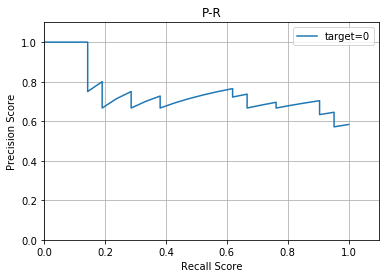

In [3]:
# P-R曲线
iris = load_iris()
X = iris.data
y = iris.target
# 二元化标记
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
#### 添加噪音
np.random.seed(0)
n_samples, n_features = X.shape
X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5, 
                                                    random_state=0)
### 训练模型
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=0))
clf.fit(X_train, y_train)
y_score = clf.fit(X_train, y_train).decision_function(X_test)

### 获取 P-R
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
precision = dict()
recall = dict()
from sklearn.metrics import precision_recall_curve
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    print(_)
    print("P:\n", precision[i])
    print("R:\n",recall[i])
    
    ax.plot(recall[i], precision[i], label="target=%s" % i)
    break
ax.set_xlabel("Recall Score")
ax.set_ylabel("Precision Score")
ax.set_title("P-R")
ax.legend(loc='best')
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
ax.grid()
plt.show()